# Project presentation

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
train_path=os.path.join("..","data","conway-reverse-game","train.csv")
data=pd.read_csv(train_path)
data.head()

,id,delta,start_0,start_1,start_2,start_3,start_4,start_5,start_6,start_7,...,stop_615,stop_616,stop_617,stop_618,stop_619,stop_620,stop_621,stop_622,stop_623,stop_624
0,0,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,3,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,3,5,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
one_step_subset=data[data["delta"]==1].reset_index()
one_step_subset.drop(["index","delta"],inplace=True,axis=1)
one_step_subset.head()

,id,start_0,start_1,start_2,start_3,start_4,start_5,start_6,start_7,start_8,...,stop_615,stop_616,stop_617,stop_618,stop_619,stop_620,stop_621,stop_622,stop_623,stop_624
0,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5,1,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,19,0,1,1,0,0,0,0,0,0,...,1,1,0,1,1,1,0,0,0,0


In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

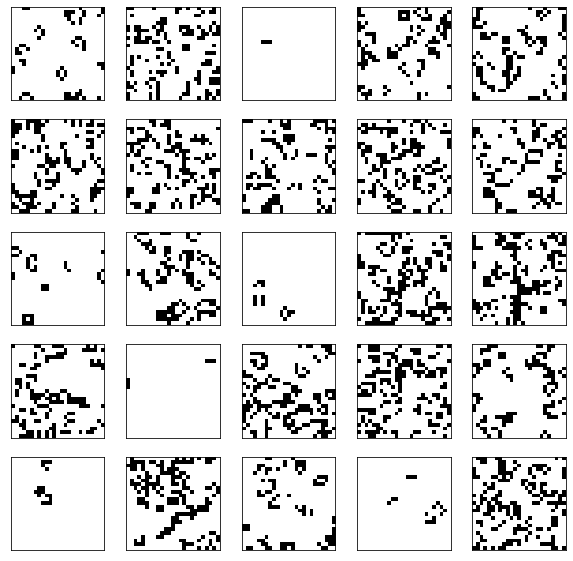

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im=np.array(one_step_subset.iloc[i,1:625+1]).reshape(25,25)
    plt.imshow(im, cmap=plt.cm.binary)
plt.show()


In [23]:
start=np.zeros([len(one_step_subset),1,25,25,1])
end=np.zeros([len(one_step_subset),1,25,25,1])
from tqdm import tqdm

for a in tqdm(range(0,len(one_step_subset))):
    end[a,:,:,:,:]=np.array(one_step_subset.iloc[a,1:625+1]).reshape(1,1,25,25,1)
    start[a,:,:,:,:]=np.array(one_step_subset.iloc[a,625+1:]).reshape(1,1,25,25,1)
    


100%|██████████| 10113/10113 [00:04<00:00, 2147.68it/s]


In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


TypeError: close() missing 1 required positional argument: 'self'

In [24]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

seq = keras.Sequential(
    [
        keras.Input(
            shape=(None, 25, 25, 1)
        ),  # Variable-length sequence of 40x40x1 frames
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=40, kernel_size=(3, 3), padding="same", return_sequences=True
        ),
        layers.BatchNormalization(),
        layers.Conv3D(
            filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
        ),
    ]
)

seq.compile(loss="binary_crossentropy", optimizer="adadelta")

seq.fit(
    end,
    start,
    batch_size=10,
    epochs=200,
    verbose=2,
    validation_split=0.1,
)


/home/nicolasrx/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/200
911/911 - 48s - loss: 0.6589 - val_loss: 0.6057
Epoch 2/200
911/911 - 36s - loss: 0.6028 - val_loss: 0.5728
Epoch 3/200
911/911 - 37s - loss: 0.5800 - val_loss: 0.5541
Epoch 4/200
911/911 - 39s - loss: 0.5618 - val_loss: 0.5409
Epoch 5/200
911/911 - 38s - loss: 0.5454 - val_loss: 0.5194
Epoch 6/200
911/911 - 37s - loss: 0.5288 - val_loss: 0.5062
Epoch 7/200
911/911 - 36s - loss: 0.5110 - val_loss: 0.4905
Epoch 8/200
911/911 - 35s - loss: 0.4916 - val_loss: 0.4694
Epoch 9/200
911/911 - 36s - loss: 0.4706 - val_loss: 0.4442
Epoch 10/200
911/911 - 36s - loss: 0.4483 - val_loss: 0.4286
Epoch 11/200
911/911 - 35s - loss: 0.4240 - val_loss: 0.3978
Epoch 12/200
911/911 - 35s - loss: 0.3999 - val_loss: 0.3680
Epoch 13/200
911/911 - 36s - loss: 0.3746 - val_loss: 0.3513
Epoch 14/200
911/911 - 37s - loss: 0.3511 - val_loss: 0.3222
Epoch 15/200
911/911 - 36s - loss: 0.3284 - val_loss: 0.2998
Epoch 16/200
911/911 - 36s - loss: 0.3077 - val_loss: 0.2835
Epoch 17/200
911/911 - 35s - loss

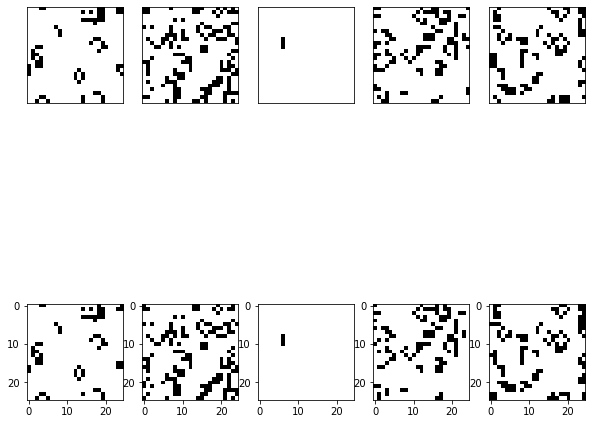

In [25]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im=start[i,:,:,:,:].reshape(25,25,1)
    plt.imshow(im, cmap=plt.cm.binary)
    plt.subplot(2,5,i+5+1)
    image=end[i,:,:,:,:].reshape(1,1,25,25,1)
    im=seq.predict(image)
    im=np.where(im > 0.5, 1, 0)
    plt.imshow(im.reshape(25,25,1), cmap=plt.cm.binary)
plt.show()


100%|██████████| 10015/10015 [00:04<00:00, 2377.81it/s]


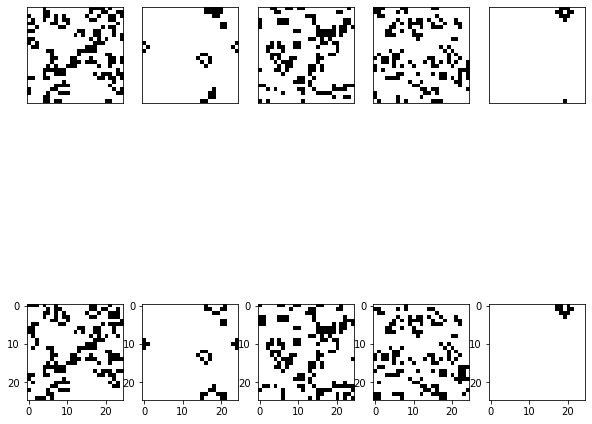

In [26]:
two_step_subset=data[data["delta"]==2].reset_index()
two_step_subset.drop(["index","delta"],inplace=True,axis=1)

start=np.zeros([len(two_step_subset),1,25,25,1])
end=np.zeros([len(two_step_subset),1,25,25,1])

for a in tqdm(range(0,len(two_step_subset))):
    end[a,:,:,:,:]=np.array(two_step_subset.iloc[a,1:625+1]).reshape(1,1,25,25,1)
    start[a,:,:,:,:]=np.array(two_step_subset.iloc[a,625+1:]).reshape(1,1,25,25,1)
    
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im=start[i,:,:,:,:].reshape(25,25,1)
    plt.imshow(im, cmap=plt.cm.binary)
    plt.subplot(2,5,i+5+1)
    image=end[i,:,:,:,:].reshape(1,1,25,25,1)
    image=seq.predict(image)
    im=seq.predict(image)
    im=np.where(im > 0.5, 1, 0)
    plt.imshow(im.reshape(25,25,1), cmap=plt.cm.binary)
plt.show()

100%|██████████| 9954/9954 [00:04<00:00, 2411.58it/s]


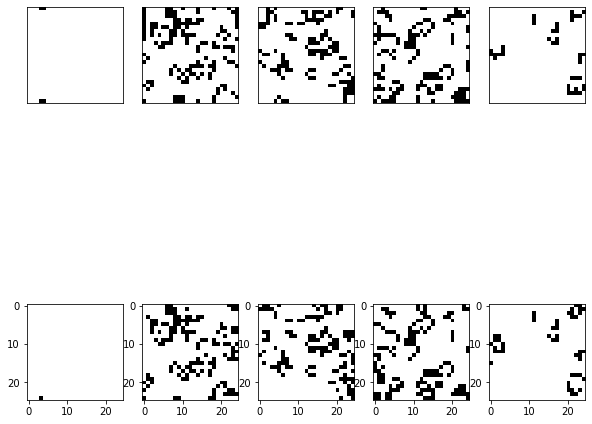

In [27]:
three_step_subset=data[data["delta"]==3].reset_index()
three_step_subset.drop(["index","delta"],inplace=True,axis=1)

start=np.zeros([len(three_step_subset),1,25,25,1])
end=np.zeros([len(three_step_subset),1,25,25,1])

for a in tqdm(range(0,len(three_step_subset))):
    end[a,:,:,:,:]=np.array(three_step_subset.iloc[a,1:625+1]).reshape(1,1,25,25,1)
    start[a,:,:,:,:]=np.array(three_step_subset.iloc[a,625+1:]).reshape(1,1,25,25,1)
    
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im=start[i,:,:,:,:].reshape(25,25,1)
    plt.imshow(im, cmap=plt.cm.binary)
    plt.subplot(2,5,i+5+1)
    image=end[i,:,:,:,:].reshape(1,1,25,25,1)
    image=seq.predict(image)
    image=seq.predict(image)
    im=seq.predict(image)
    im=np.where(im > 0.5, 1, 0)
    plt.imshow(im.reshape(25,25,1), cmap=plt.cm.binary)
plt.show()

100%|██████████| 9968/9968 [00:04<00:00, 2368.43it/s]


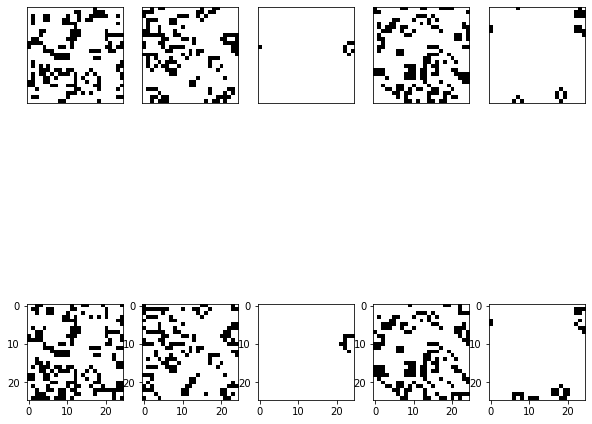

In [28]:
four_step_subset=data[data["delta"]==4].reset_index()
four_step_subset.drop(["index","delta"],inplace=True,axis=1)

start=np.zeros([len(four_step_subset),1,25,25,1])
end=np.zeros([len(four_step_subset),1,25,25,1])

for a in tqdm(range(0,len(four_step_subset))):
    end[a,:,:,:,:]=np.array(four_step_subset.iloc[a,1:625+1]).reshape(1,1,25,25,1)
    start[a,:,:,:,:]=np.array(four_step_subset.iloc[a,625+1:]).reshape(1,1,25,25,1)
    
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im=start[i,:,:,:,:].reshape(25,25,1)
    plt.imshow(im, cmap=plt.cm.binary)
    plt.subplot(2,5,i+5+1)
    image=end[i,:,:,:,:].reshape(1,1,25,25,1)
    image=seq.predict(image)
    image=seq.predict(image)
    image=seq.predict(image)
    im=seq.predict(image)
    im=np.where(im > 0.5, 1, 0)
    plt.imshow(im.reshape(25,25,1), cmap=plt.cm.binary)
plt.show()